In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('c:/reposit/data/철원이형/house_prices.csv', encoding='cp949')
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


##  방의 개수(RM)가 7개 초과일 확률

In [3]:
rm = df[df['RM']>7]
rm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [4]:
len(rm) / len(df)

0.12648221343873517

### 조건부 확률

In [7]:
ptratio = df[df['PTRATIO']<15]
ptratio.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.9,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,396.9,26.42,15.6
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.9,29.29,11.8


In [8]:
p_ptratio = len(ptratio) / len(df)
p_ptratio

0.11462450592885376

In [9]:
ptratio_rm = df[(df['RM']>7) & (df['PTRATIO']<15)]
ptratio_rm.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0


In [10]:
p_ptratio_rm = len(ptratio_rm) / len(df)
p_ptratio_rm

0.04940711462450593

In [11]:
p = p_ptratio_rm / p_ptratio
p

0.43103448275862066

## 평균, 분산, 표준편차

### 평균

In [12]:
np.mean(df['RM'])

6.284634387351779

In [13]:
df['RM'].mean()

6.284634387351779

In [14]:
n = len(df)

sum_x = 0

for x in df['RM']:
    sum_x += x

mean_rm = sum_x / n
mean_rm

6.284634387351787

### 분산

In [15]:
np.var(df['RM'])

0.49269521612976347

In [16]:
df['RM'].var()

0.4936708502211095

In [17]:
np.std(df['RM'])

0.7019225143345692

In [18]:
df['RM'].std()

0.7026171434153237

In [19]:
n = len(df)
ss = 0
for x in df['RM']:
    ss += (x - mean_rm)**2

In [20]:
var_rm = ss / n
std_rm = var_rm**0.5

var_rm, std_rm

(0.49269521612976347, 0.7019225143345692)

In [21]:
var_rm = ss / (n-1)
std_rm = var_rm**0.5

var_rm, std_rm

(0.4936708502211095, 0.7026171434153237)

In [22]:
# 넘파이
np.var(df['RM'], ddof=0), np.var(df['RM'], ddof=1)

(0.49269521612976347, 0.4936708502211095)

In [23]:
# 판다스
df['RM'].var(ddof=0), df['RM'].var()

(0.49269521612976347, 0.4936708502211095)

### 공분산

In [24]:
X = df[['CRIM', 'NOX', 'RM', 'AGE', 'TAX']]
X

,CRIM,NOX,RM,AGE,TAX
0,0.00632,0.538,6.575,65.2,296
1,0.02731,0.469,6.421,78.9,242
2,0.02729,0.469,7.185,61.1,242
3,0.03237,0.458,6.998,45.8,222
4,0.06905,0.458,7.147,54.2,222
...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,273
502,0.04527,0.573,6.120,76.7,273
503,0.06076,0.573,6.976,91.0,273
504,0.10959,0.573,6.794,89.3,273


In [25]:
cov_x = np.cov(X, rowvar=0) # rowvar=0 행이 아니라 열을 기준으로
cov_x

array([[ 7.39865782e+01,  4.19593894e-01, -1.32503785e+00,
         8.54053223e+01,  8.44821538e+02],
       [ 4.19593894e-01,  1.34276357e-02, -2.46034495e-02,
         2.38592720e+00,  1.30462855e+01],
       [-1.32503785e+00, -2.46034495e-02,  4.93670850e-01,
        -4.75192919e+00, -3.45834478e+01],
       [ 8.54053223e+01,  2.38592720e+00, -4.75192919e+00,
         7.92358399e+02,  2.40269012e+03],
       [ 8.44821538e+02,  1.30462855e+01, -3.45834478e+01,
         2.40269012e+03,  2.84047595e+04]])

In [26]:
cov_x = np.cov(X.T)
cov_x

array([[ 7.39865782e+01,  4.19593894e-01, -1.32503785e+00,
         8.54053223e+01,  8.44821538e+02],
       [ 4.19593894e-01,  1.34276357e-02, -2.46034495e-02,
         2.38592720e+00,  1.30462855e+01],
       [-1.32503785e+00, -2.46034495e-02,  4.93670850e-01,
        -4.75192919e+00, -3.45834478e+01],
       [ 8.54053223e+01,  2.38592720e+00, -4.75192919e+00,
         7.92358399e+02,  2.40269012e+03],
       [ 8.44821538e+02,  1.30462855e+01, -3.45834478e+01,
         2.40269012e+03,  2.84047595e+04]])

In [27]:
cov_x = X.cov()
cov_x

,CRIM,NOX,RM,AGE,TAX
CRIM,73.986578,0.419594,-1.325038,85.405322,844.821538
NOX,0.419594,0.013428,-0.024603,2.385927,13.046286
RM,-1.325038,-0.024603,0.493671,-4.751929,-34.583448
AGE,85.405322,2.385927,-4.751929,792.358399,2402.690122
TAX,844.821538,13.046286,-34.583448,2402.690122,28404.759488


### 피어슨 상관계수

In [28]:
corr_x = np.corrcoef(X.T)
corr_x

array([[ 1.        ,  0.42097171, -0.2192467 ,  0.35273425,  0.58276431],
       [ 0.42097171,  1.        , -0.30218819,  0.7314701 ,  0.6680232 ],
       [-0.2192467 , -0.30218819,  1.        , -0.24026493, -0.29204783],
       [ 0.35273425,  0.7314701 , -0.24026493,  1.        ,  0.50645559],
       [ 0.58276431,  0.6680232 , -0.29204783,  0.50645559,  1.        ]])

In [29]:
corr_x = X.corr()
corr_x

,CRIM,NOX,RM,AGE,TAX
CRIM,1.000000,0.420972,-0.219247,0.352734,0.582764
NOX,0.420972,1.000000,-0.302188,0.731470,0.668023
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.292048
AGE,0.352734,0.731470,-0.240265,1.000000,0.506456
TAX,0.582764,0.668023,-0.292048,0.506456,1.000000


In [30]:
import seaborn as sns

<Axes: >

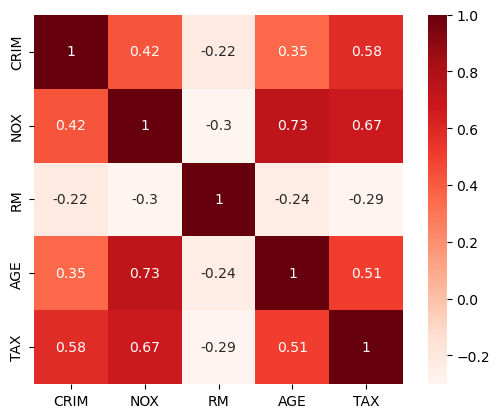

In [32]:
sns.heatmap(corr_x, annot=True, cmap='Reds', square=True)

<Axes: xlabel='NOX', ylabel='AGE'>

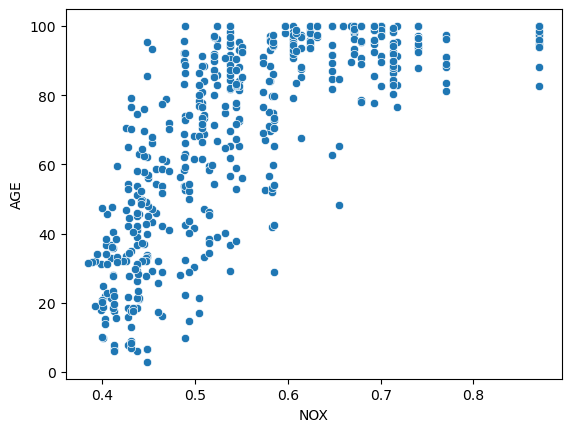

In [33]:
sns.scatterplot(data=df, x='NOX', y='AGE')

<Axes: xlabel='NOX', ylabel='TAX'>

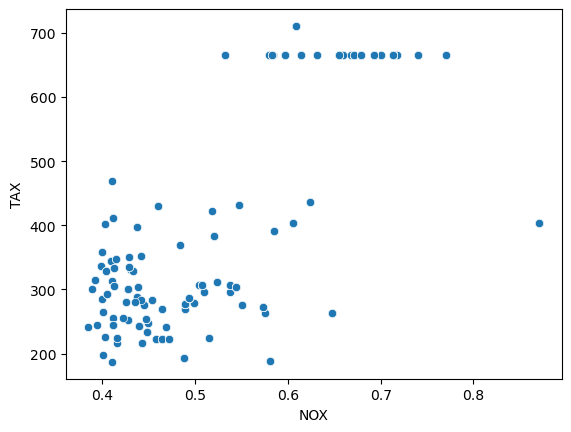

In [34]:
sns.scatterplot(data=df, x='NOX', y='TAX')